# Sequential API/CNN

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()
num_labels=len(np.unique(y_train))
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
shape1=x_train.shape[1]
shape2=x_train.shape[2]
x_train=x_train.reshape(-1,shape1,shape2,1).astype('float32') #4D tensor로 변경해줌
x_test=x_test.reshape(-1,shape1, shape2,1).astype('float32')   #4D tensor로 변경해줌
x_train=x_train/255.
x_test=x_test/255.
# 표본수를 포함하여 4D tensor이므로 입력은 3D 텐서가 된다.
# 인수값을 미리 지정하여 사용한다.
input_shape=(shape1, shape2,1)
batch_size=64
kernel_size=3 #2D convolution에서 3*3 kernel을 사용
pool_size=2
filters=64
dropout=0.3

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
print("partial_x_train",partial_x_train.shape)
print("partial_y_train",partial_y_train.shape)

partial_x_train (50000, 28, 28, 1)
partial_y_train (50000, 10)


In [ ]:
model=Sequential()
model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size)) # pool_size=2 이므로 2*2 kernel에 의해 크기가 13*13으로 줄어듬
model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size)) # pool_size=2 이므로 2*2 kernel에 의해 크기가 5*5으로 줄어듬
model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(Flatten()) # 3*3*64=576 결과를 만들기 위해 MLP로 전환 필요: 4D->2D 전환
model.add(Dropout(dropout))
model.add(Dense(num_labels, activation='softmax'))
model.summary() #MLP(모수: 269,322)에 비해서 모수의 수가 1/3 정도로 줄어듬

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0

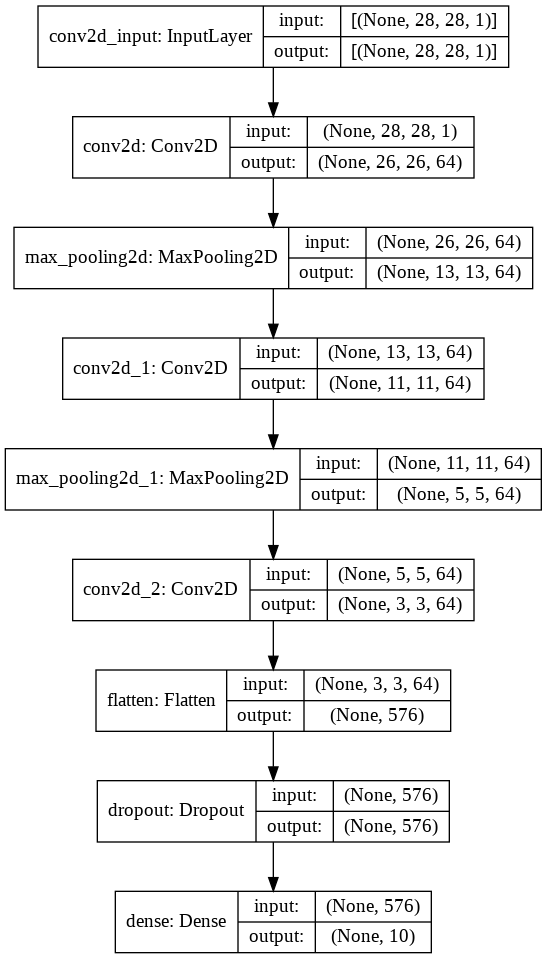

In [ ]:
plot_model(model, to_file='D:\BDSC402\MLPmodel.png',show_shapes=True)

In [ ]:
~model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=100, batch_size=64,validation_data=(x_val,y_val))
results=model.evaluate(x_test, y_test)
print(results)  #CNN 장점: 1/3 정도의 모수를 사용하여 좋은 결과를 얻을 수 있다

Epoch 1/100
938/938 [==============================] - 82s 86ms/step - loss: 0.2125 - accuracy: 0.9340 - val_loss: 0.0702 - val_accuracy: 0.9768
Epoch 2/100
938/938 [==============================] - 82s 87ms/step - loss: 0.0602 - accuracy: 0.9815 - val_loss: 0.0312 - val_accuracy: 0.9907
Epoch 3/100
938/938 [==============================] - 82s 87ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0231 - val_accuracy: 0.9927
Epoch 4/100
938/938 [==============================] - 81s 87ms/step - loss: 0.0360 - accuracy: 0.9881 - val_loss: 0.0199 - val_accuracy: 0.9940
Epoch 5/100
938/938 [==============================] - 81s 87ms/step - loss: 0.0314 - accuracy: 0.9897 - val_loss: 0.0142 - val_accuracy: 0.9960
Epoch 6/100
938/938 [==============================] - 84s 89ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.0119 - val_accuracy: 0.9967
Epoch 7/100
938/938 [==============================] - 81s 87ms/step - loss: 0.0229 - accuracy: 0.9920 - val_loss: 0.0110 - val_ac

In [ ]:
history_out=history.history
history_out.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

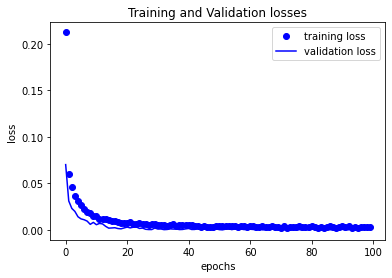

In [ ]:
import matplotlib.pyplot as plt

loss=history_out['loss']
loss_val=history_out['val_loss']
accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']
plt.plot(loss, 'bo', label='training loss')
plt.plot(loss_val,'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

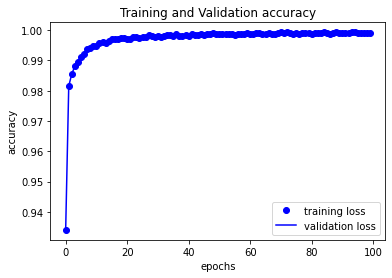

In [ ]:
plt.clf()
plt.plot(accuracy, 'bo', label='training loss')
plt.plot(accuracy,'b', label='validation loss')
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from keras.layers import Dense, Dropout, Input
from keras.models import Model

x=Input(shape=input_shape)
h=Conv2D(filters=filters,kernel_size=kernel_size, activation='relu')(x)
h=MaxPooling2D()(h)  #MaxPooling2D의 default: (2,2)
h=Conv2D(filters=filters,kernel_size=kernel_size, activation='relu')(h)
h=MaxPooling2D()(h)  #MaxPooling2D의 default: (2,2)
h=Conv2D(filters=filters,kernel_size=kernel_size, activation='relu')(h)
h=Flatten()(h)
h=Dropout(dropout)(h)
out=Dense(num_labels, activation='softmax')(h)
model=Model(inputs=x, outputs=out)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2=model.fit(x_train, y_train,epochs=100, batch_size=64,validation_data=(x_val,y_val))
score=model.evaluate(x_test, y_test)
print(score)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0   

In [ ]:
history2_out=history2.history
history2_out.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

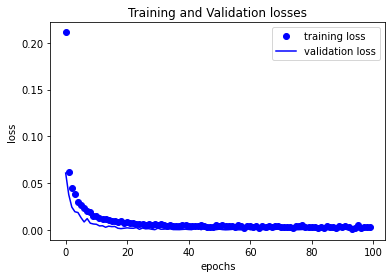

In [ ]:
import matplotlib.pyplot as plt

loss=history2_out['loss']
loss_val=history2_out['val_loss']
accuracy=history2_out['accuracy']
accuracy_val=history2_out['val_accuracy']
plt.plot(loss, 'bo', label='training loss')
plt.plot(loss_val,'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

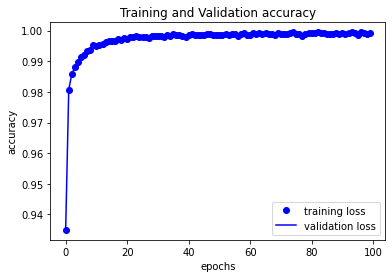

In [ ]:
plt.clf()
plt.plot(accuracy, 'bo', label='training loss')
plt.plot(accuracy,'b', label='validation loss')
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# SimpleRNN

In [ ]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout, SimpleRNN
from keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()
num_labels=len(np.unique(y_train))
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
shape1=x_train.shape[1]
shape2=x_train.shape[2]
x_train=x_train.reshape(-1,shape1,shape2,1).astype('float32') #4D tensor로 변경해줌
x_test=x_test.reshape(-1,shape1, shape2,1).astype('float32')   #4D tensor로 변경해줌
x_train=x_train/255.
x_test=x_test/255.
input_shape1=(shape1, shape2)  #RNN의 표본 하나당 입력은 2D tensor

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


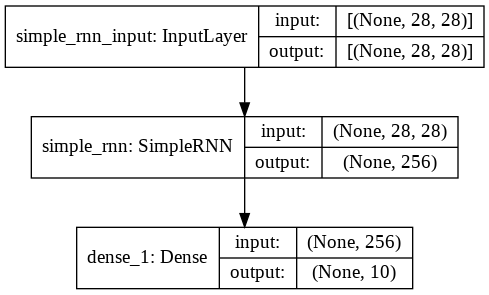

In [ ]:
model=Sequential()
model.add(SimpleRNN(units=256, dropout=0.2, input_shape=input_shape1))
model.add(Dense(10, activation='softmax'))
model.summary()
plot_model(model, to_file='D:\BDSC402\MLPmodel.png',show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=64)
score=model.evaluate(x_test, y_test)  #test data의 결과 출력
print(score)

Epoch 1/100
938/938 [==============================] - 80s 84ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 2/100
484/938 [==============>...............] - ETA: 38s - loss: 4.6505e-04 - accuracy: 0.9998

# Function API/CNN

In [ ]:
from keras.layers import Dense, Dropout, Input

x=Input(shape=input_shape1)
h=SimpleRNN(256,dropout=0.2)(x)
out=Dense(10, activation='softmax')(h)
model=Model(inputs=x, outputs=out)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=128)
score=model.evaluate(x_test, y_test)  #test data의 결과 출력
print(score)

Epoch 1/100
469/469 [==============================] - 32s 65ms/step - loss: 0.4776 - accuracy: 0.8508
Epoch 2/100
469/469 [==============================] - 30s 65ms/step - loss: 0.2291 - accuracy: 0.9321
Epoch 3/100
469/469 [==============================] - 30s 65ms/step - loss: 0.1829 - accuracy: 0.9461
Epoch 4/100
469/469 [==============================] - 30s 65ms/step - loss: 0.1600 - accuracy: 0.9524
Epoch 5/100
469/469 [==============================] - 31s 65ms/step - loss: 0.1460 - accuracy: 0.9565
Epoch 6/100
469/469 [==============================] - 31s 65ms/step - loss: 0.1308 - accuracy: 0.9623
Epoch 7/100
469/469 [==============================] - 31s 65ms/step - loss: 0.1245 - accuracy: 0.9631
Epoch 8/100
469/469 [==============================] - 31s 65ms/step - loss: 0.1183 - accuracy: 0.9645
Epoch 9/100
469/469 [==============================] - 30s 65ms/step - loss: 0.1157 - accuracy: 0.9658
Epoch 10/100
469/469 [==============================] - 30s 65ms/step - l